In [1]:
from utils import *

In [2]:
video_path = '/home/ubuntu/SML/SIGMAxPortal301-Team2/심화과제_1/video/2.mp4'
video = read_video_to_tensor(video_path, frame_step=10)

In [3]:
print(f"Video shape: {video.shape}")

Video shape: torch.Size([55, 3, 1080, 1920])


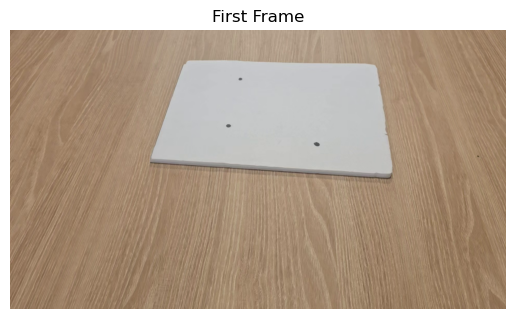

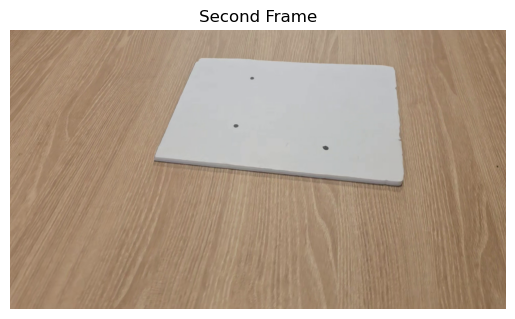

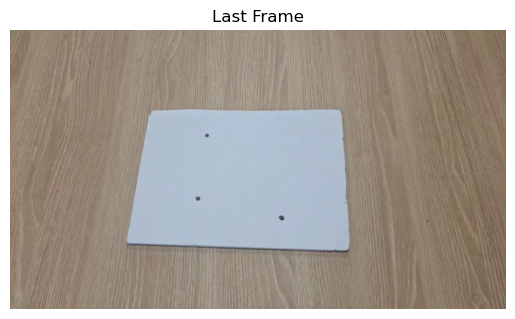

In [4]:
show_picture(video[0], title='First Frame')
show_picture(video[1], title='Second Frame')
show_picture(video[-1], title='Last Frame')

In [5]:
highlighted_pictures = []
for i in range(20):
    segments, highlighted_frame = heuristic_marker_highlight(video[i], threshold=0.5, picture=True)
    highlighted_pictures.append(highlighted_frame)

5977 Black Pixels,  73 Segments.
7162 Black Pixels,  43 Segments.
7420 Black Pixels,  24 Segments.
8595 Black Pixels,  29 Segments.
8826 Black Pixels,  12 Segments.
10669 Black Pixels,  20 Segments.
11094 Black Pixels,  34 Segments.
11359 Black Pixels,  19 Segments.
11432 Black Pixels,  28 Segments.
16228 Black Pixels,  22 Segments.
20020 Black Pixels,  16 Segments.
21077 Black Pixels,  32 Segments.
24812 Black Pixels,  17 Segments.
21784 Black Pixels,  14 Segments.
8575 Black Pixels,  19 Segments.
8897 Black Pixels,  117 Segments.
142732 Black Pixels,  1221 Segments.
290062 Black Pixels,  2229 Segments.
292473 Black Pixels,  3378 Segments.
257115 Black Pixels,  1609 Segments.


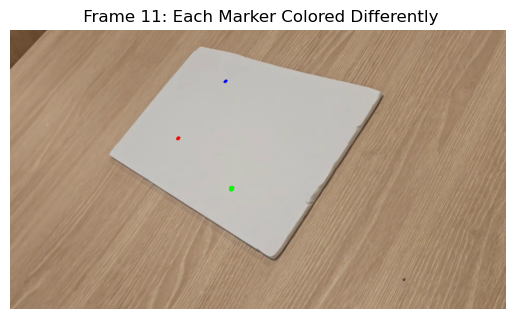

In [15]:
i = 10
show_picture(highlighted_pictures[i], title=f' Frame {i+1}: Each Marker Colored Differently')